In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

submissions = {'IDS': [29956349, 30426856, 30276814, 30270275, 30428273, 30428350, 30428424, 30428793, 30715966, 30715275, 30716317, 30741316], 
               'LB Scores': [66.24, 82.87, 82.86, 79.38, 82.5, 78.91, 82.75, 81.75, 82.66, 83.02, 83.03, 82.12], 
               'Validation Scores': [76.36, 90.43, 90.49, 88.49, 90.24, 88.81, 88.9, 89.65, 88.65, 91.19, 91.32, 91.14]}
scores = pd.DataFrame(submissions)
scores.loc[:, 'delta'] = scores['Validation Scores'] - scores['LB Scores']
scores.loc[:, 'Predicted LB'] = scores['Validation Scores'] - np.mean(scores['delta'])
scores.loc[:, 'Predicted LB lower bound'] = scores['Validation Scores'] - np.mean(scores['delta']) - np.std(scores['delta']) 
scores.loc[:, 'Predicted LB upper bound'] = scores['Validation Scores'] - np.mean(scores['delta']) + np.std(scores['delta']) 

In [2]:
scores

,IDS,LB Scores,Validation Scores,delta,Predicted LB,Predicted LB lower bound,Predicted LB upper bound
0,29956349,66.24,76.36,10.12,68.228333,66.998409,69.458258
1,30426856,82.87,90.43,7.56,82.298333,81.068409,83.528258
2,30276814,82.86,90.49,7.63,82.358333,81.128409,83.588258
3,30270275,79.38,88.49,9.11,80.358333,79.128409,81.588258
4,30428273,82.50,90.24,7.74,82.108333,80.878409,83.338258
5,30428350,78.91,88.81,9.90,80.678333,79.448409,81.908258
6,30428424,82.75,88.90,6.15,80.768333,79.538409,81.998258
7,30428793,81.75,89.65,7.90,81.518333,80.288409,82.748258
8,30715966,82.66,88.65,5.99,80.518333,79.288409,81.748258
9,30715275,83.02,91.19,8.17,83.058333,81.828409,84.288258


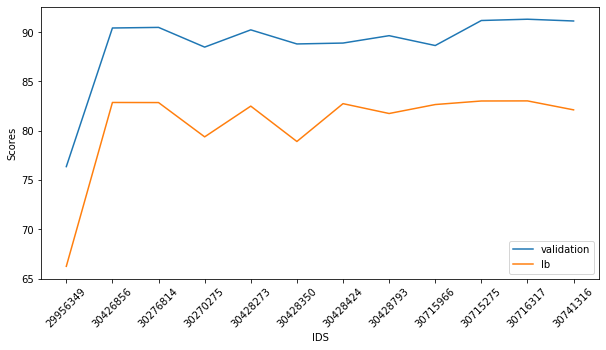

In [3]:
plt.figure(figsize = (10,5))
plt.xticks(np.arange(len(scores)), scores['IDS'].values, rotation = '45')
plt.xlabel('IDS')
plt.ylabel('Scores')
plt.plot(scores['Validation Scores'].values)
plt.plot(scores['LB Scores'].values)
plt.legend(['validation', 'lb'])
plt.show()